In [12]:
#read vote data from csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

%matplotlib inline

#input file
constituency="DublinWest2002"
my_csv='../data/'+constituency+'.csv'
#my_csv ='../data/Meath2002.csv'
#my_csv ='../data/DublinNorth2002.csv'
#my_csv ='../data/DublinWest2002.csv'

#read in data (setting 1st row as header)
df = pd.read_csv(my_csv, na_values=["Missing"], header=[0])

#set column names as first line
df.head()
print("Print Data Frame (df)")
print(df)
print("Print Column names")
print(df.columns)

#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#reset index to start a 1 and not 0
df.index = df.index + 1

Print Data Frame (df)
       Unnamed: 0   GP   LB   FF   SP  FF.1   SF   PD   NP   FG
0               1  NaN  4.0  NaN  3.0   NaN  NaN  1.0  5.0  2.0
1               2  NaN  NaN  2.0  NaN   1.0  4.0  3.0  NaN  NaN
2               3  NaN  NaN  3.0  NaN   1.0  NaN  2.0  NaN  NaN
3               4  NaN  2.0  NaN  NaN   NaN  NaN  3.0  NaN  1.0
4               5  NaN  2.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN
...           ...  ...  ...  ...  ...   ...  ...  ...  ...  ...
29983       29984  4.0  2.0  NaN  5.0   NaN  NaN  3.0  NaN  1.0
29984       29985  NaN  1.0  5.0  NaN   3.0  NaN  4.0  NaN  2.0
29985       29986  9.0  3.0  5.0  2.0   6.0  4.0  7.0  8.0  1.0
29986       29987  6.0  5.0  2.0  NaN   1.0  NaN  4.0  NaN  3.0
29987       29988  3.0  4.0  NaN  NaN   1.0  NaN  NaN  NaN  2.0

[29988 rows x 10 columns]
Print Column names
Index(['Unnamed: 0', 'GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG'], dtype='object')


# Statistics on election - candidates and votes

In [13]:
#Stats No. of Candidates(columns) and Votes(rows), all combinations of candidates = candidates!
print("Statistics on Dataframe")
candidates = len(df.columns)
print("No. of Candidates = ", candidates)
votes = len(df.index)
print("No. of Votes = ", votes)
print("No. of all possible Combinations (candidates)! = ", math.factorial(candidates))

Statistics on Dataframe
No. of Candidates =  9
No. of Votes =  29988
No. of all possible Combinations (candidates)! =  362880


## Additional Statistics on Actual Vote Data

In [14]:
import statistics as stats
df.head()
#print(df.describe())
df.max()
# find the maximum values of each row (the highest vote preference cast)
maxValues = df.max(axis = 1)
#print(maxValues)
#mean - average 
print(f"Average(Mean) value = {stats.mean(maxValues)}")
#mode - most frequent occuring value
print(f"Mode(most often number of votes cast = {stats.mode(maxValues)}")
#median - middle value
print(f"Middle value of votes cast = {stats.median(maxValues)}")


Average(Mean) value = 4.425970388155262
Mode(most often number of votes cast = 3.0
Middle value of votes cast = 4.0


## Calculate maximum values (number of preferences) for each vote(row)

In [15]:
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

In [16]:
mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)
print(mval.values)
print(mval.index)

[1743 3243 8753 5157 3389 1866 1027 1010 3800]
Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')


# Plot Histogram of the number of transfers a voter casts

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')
[1743 3243 8753 5157 3389 1866 1027 1010 3800]
[0 1 2 3 4 5 6 7 8]


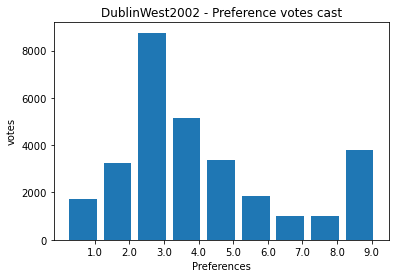

In [17]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#counts = Counter(word_list)
#labels, values = zip(*counts.items())
# sort your values in descending order
#indSort = np.argsort(values)[::-1]

# rearrange your data
labels=mval.index
values=mval.values
indexes = np.arange(len(labels))
print(labels)
print(values)
print(indexes)

bar_width = 0.35

# Add title and axis names
plt.title(constituency+' - Preference votes cast')
plt.xlabel('Preferences')
plt.ylabel('votes')

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)


# Save the histogram
plt.savefig('../images/'+constituency+'hist.png')

#show histogram
plt.show()

## Print number of preferences cast, and calculate percentage

In [18]:
print(indexes)
print(values)
type(values)
print(values.sum())

# creating the dataframe from dictionary
d={"Pref. No.": labels, "Votes": values}    
dfpref = pd.DataFrame(d)
votz = dfpref.Votes.sum()  
dfpref['Percentage'] = round(((dfpref['Votes']/votz)*100), 1)
# displaying the dataframe
display(dfpref)

[0 1 2 3 4 5 6 7 8]
[1743 3243 8753 5157 3389 1866 1027 1010 3800]
29988


,Pref. No.,Votes,Percentage
0,1.0,1743,5.8
1,2.0,3243,10.8
2,3.0,8753,29.2
3,4.0,5157,17.2
4,5.0,3389,11.3
5,6.0,1866,6.2
6,7.0,1027,3.4
7,8.0,1010,3.4
8,9.0,3800,12.7


# Calculate number of duplicated vote sequences

In [19]:
print((~df.duplicated()).sum())
print(df.duplicated(keep='last').value_counts())

10335
True     19653
False    10335
dtype: int64


In [20]:
#drop all dublicate rows keeping last one
df.drop_duplicates(keep='last', inplace=True, subset=df.columns.difference(['maxValues']))

In [ ]:
#print the number of votes, and the number of unique votes
print(f"Number of votes {votes}")
print(f"Number of unique vote patterns (after removing duplicates) {len(df)}")

# Generate Random Sequences

In [ ]:
#generate random sequences which could be possible vote combinations
from itertools import permutations
import pandas as pd
import math 
#lst 1 to n
candidates =10
listAllCombinations = list(range(1,candidates+1))
allCombinations = list(permutations(listAllCombinations))
#print("All Combinations (candidates)!",len(allCombinations))
#print("All Combinations (candidates)!",math.factorial(candidates))
print(allCombinations)
dfallCombinations = pd.DataFrame(allCombinations)
#display(dfallCombinations)

In [ ]:
#remove regular(actual vote transfers form all combinations)

In [ ]:
#remove possible regular votes - logical party couplets or triplets in sequence

In [ ]:
#create irregular list and dataframe
irrList =[]
newrow1 =[4,5,6,3,2,1]
irrList.append(newrow1)
newrow2 =[6,5,4,3,2,1]
irrList.append(newrow2)

#make dataframe from list
dfIrreg = pd.DataFrame(irrList)
dfIrreg.columns=df.columns
display(dfIrreg)
#set all columns as "I" Irregular
dfIrreg['Type']='I'

#set all columns as "R" Regular
df['Type']='R'
print("Print Data Frame (df) with Type column")
print(df)

In [ ]:
#Merge Regular and Irregular DataFrames and write to file
# merge two data frames
print('After merging:')
#pd.concat([df, dfIrreg], axis=0)
df= df.append(dfIrreg, ignore_index=True)
#reset index
df.index= df.index+1
display(df)

#write to csv file
df.to_csv('../data/output.csv')

In [ ]:
from itertools import permutations
import pandas as pd
import math 
#lst 1 to n
candidates = 8
listAllCombinations = list(range(1,candidates+1))
allCombinations = list(permutations(listAllCombinations))
print("All Combinations (candidates)!",len(allCombinations))
print("All Combinations (candidates)!",math.factorial(5))
print(allCombinations)
dfallCombinations = pd.DataFrame(allCombinations)
display(dfallCombinations)

In [ ]:
import numpy as np
first_list = [12, 13, 14, 12]
sec_list   = [12, 13, 14, 12]

result = np.array_equal(np.array(first_list), np.array(sec_list))
if result:
    print('Lists are equal i.e. contain similar elements with same frequency')
else:
    print('Lists are not equal')

In [ ]:
#how many permutations P(n,r)=n!/(n-r)!
import math
n=10 #number of candidates
r=3 #number of votes/preferences cast by a voter
math.factorial(n)
P = (math.factorial(n)/math.factorial(n-r))
print(f"Permutations - P(n,r) = P({n},{r}) = {int(P)}")

In [ ]:
#permutations P(n,r)=n!/(n-r)!
from itertools import permutations 

#generate a list of numbers 1 to n (number of candidates)
n=14
nList = list(range(1,n+1))
print(nList)

#the number of numbers r to be generated in a permutation(number of preferences cast)
r=8
#generate r permutations of the values in nlist
p = permutations(nList,r) 

# Print the obtained permutations 
for j in list(p): 
    print(j) 

In [ ]:
#select a random number of permutations
p = permutations(nList,r) 

dfp=pd.DataFrame(list(p))
#print(dfp)
#print(dfp.sample(n=12))

In [ ]:
p = permutations(nList,r) 
an_array = np.empty(n)
an_array[:] = np.NaN
print(an_array)
for s in list(p):
    u=1
    for t in list(s):
        print(t)
        an_array[t-1]=u
        u=u+1
        
print(an_array)
        




In [ ]:
p = permutations(nList,r)
print(df.columns)
# Drop last column of a dataframe
df = df.iloc[: , :-1]
print(df.columns)
an_array = np.empty(n)
an_array[:] = np.NaN
print(an_array)
dfp=pd.DataFrame(columns=df.columns)
for s in list(p):
    larray =np.array(s)        
    print(larray)
    z=1
    an_array[:] = np.NaN
    for y in larray:
        an_array[y-1]=z
        z=z+1
    print(an_array)
    dfp.append(an_array)
        

In [ ]:
dfpp=dfp.sample(n=1)[:1]
print(dfpp)

In [ ]:
dft= pd.DataFrame()
dft=df.tail()
print(dft.columns)
partiesList= list(dft.columns)
del partiesList[-1]
print(partiesList)



In [ ]:
partiesList2=[]
for pl in partiesList:
    #print(pl[:2] )
    partiesList2.append(pl[:2])
print(partiesList2)

In [ ]:
#download compass data positioning irish political parties on the political spectrum
indata='../data/pc.csv'

#set column names
col_names = ['party', 'xaxis', 'yaxis']
#read in data
df = pd.read_csv(indata, na_values=["Missing"], names=col_names)
print("Irish Parties on Political Compass")
print(df)
points=[]
points = df.party
x=[] #x-axis coordinates
y=[] #y-axis coordinates
pt=[]

#populate two lists with the x and y - coordinates
for p in points:
    pt.append(df.party)
    x.append(df.xaxis)
    y.append(df.yaxis)

In [ ]:
print(partiesList2)
result = []
print(len(dft))
dft.drop(dft.columns[len(dft.columns)-1], axis=1, inplace=True)

for i in range(len(dft)):
    row = list(dft.iloc[i])
    #print(np.nanmax(row))
    #print(f"{row}")
    resultRow=[]
    for i in range(1,int(np.nanmax(row))+1):
        vidx=row.index(float(i))
        resultRow.append(partiesList2[vidx])
    print(resultRow)
    result.append(resultRow)

In [ ]:
print(result)
print(df.party)

In [ ]:
#Irregular Vote
#dVote= ['NP', 'SP', 'LB', 'SF', 'FF', 'GP', 'FG']
#Regular Vote
dVote =['FG','FG','FF', 'GP']

#populate 3 lists with text, x co-ord and y co-ord
dfi = df.party.tolist()
print("dfi",dfi)
xi=[]
yi=[]
pp=[]
for d in dVote:
    inx=dfi.index(d)
    pp.append(df.iloc[inx].tolist()[0])
    xi.append(df.iloc[inx].tolist()[1])
    yi.append(df.iloc[inx].tolist()[2])
#print(df.iloc[inx].tolist()[2])
for ip in range(len(pp)):
    print(f"{ip+1} - {pp[ip]} ({xi[ip]}, {yi[ip]})")



#Calculate the eculidean distance a vote travels on the political spectrum
dist = 0
total_dist=0
for pl in range(len(pp)):
# initializing points in
# numpy arrays      
    if pl != (len(pp)-1):
        point1 = np.array((xi[pl],yi[pl]))
        point2 = np.array((xi[pl+1],yi[pl+1]))

#calculating Euclidean distance
# using linalg.norm()
        dist = np.linalg.norm(point1 - point2)
        print(f"Euclidean distance between vote {pl+1} and {pl+2} is {dist}")
        total_dist = total_dist + dist
        
avg_dist = total_dist/(len(pp)-1)    
print("Total Distance Travelled on Political Compass as a vote transfers ", total_dist)
print("Average Distance Travelled on Political Compass of each vote transfers ", avg_dist)
